In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# 加载数据集
transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=0)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=0)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


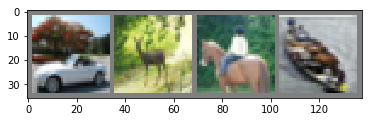

  car  deer horse  ship


In [3]:
# 展示一些图片
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
# 定义一个简单的卷积神经网络
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [5]:
# 优化网络
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 4000 == 3999:
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 4000))
            running_loss = 0.0
print('Finshed Training!')

[1,  4000] loss: 2.028
[1,  8000] loss: 1.632
[1, 12000] loss: 1.493
[2,  4000] loss: 1.373
[2,  8000] loss: 1.338
[2, 12000] loss: 1.290
[3,  4000] loss: 1.209
[3,  8000] loss: 1.194
[3, 12000] loss: 1.186
[4,  4000] loss: 1.121
[4,  8000] loss: 1.110
[4, 12000] loss: 1.090
[5,  4000] loss: 1.014
[5,  8000] loss: 1.051
[5, 12000] loss: 1.031
Finshed Training!


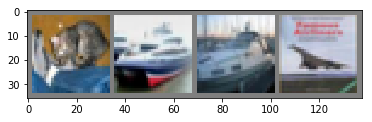

Ground Truth:
  cat  ship  ship plane
Predictions:
  cat  ship plane plane


In [6]:
# 预测几张图片试一下
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('Ground Truth:')
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
with torch.no_grad():
    sample_outputs = net(images)
    _, predicted = torch.max(sample_outputs, 1)
print('Predictions:')
print(' '.join('%5s' % classes[predicted[j]] for j in range(4)))

In [7]:
# 统计在整个数据集上的结果
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100*correct/total))

Accuracy of the network on the 10000 test images: 62 %


In [8]:
# 输出每一类的准确率
class_correct = list(0. for i in range(10))
class_total  = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label]  += 1
for i in range(10):
    print('Accuracy of %5s: %2d %%' % (classes[i], 100*class_correct[i]/class_total[i]))

Accuracy of plane: 69 %
Accuracy of   car: 81 %
Accuracy of  bird: 35 %
Accuracy of   cat: 51 %
Accuracy of  deer: 53 %
Accuracy of   dog: 44 %
Accuracy of  frog: 74 %
Accuracy of horse: 70 %
Accuracy of  ship: 75 %
Accuracy of truck: 65 %


In [9]:
# 尝试使用GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

net.to(device)
inputs, labels = inputs.to(device), labels.to(device)

cpu
